## LOGISTIC REGRESSION - CREDIT RISK DEFAULT

# Problem Statement: 

* Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.


* Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

* While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

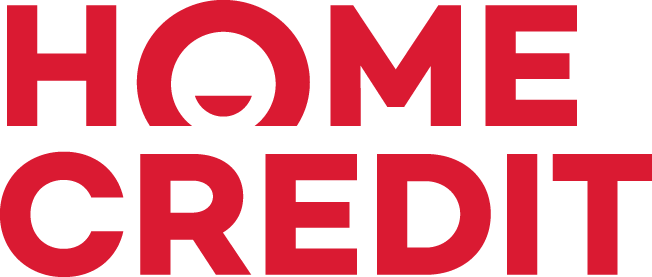

In [140]:
from IPython import display 
display.Image("http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/image-gallery/full/image-gallery-01-11-2016-b.png")

In [76]:
#Reading data
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Basic exploration 

In [77]:
df = pd.read_csv("C:\Praxis\Term-2\AIF\Assignment\application_train.csv")

In [78]:
df.shape

(307511, 122)

In [79]:
df.sample(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
304832,453175,0,Cash loans,F,N,N,0,189000.0,526491.0,25456.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
214006,347986,0,Cash loans,M,Y,Y,0,180000.0,900000.0,29164.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
247097,385939,0,Cash loans,F,Y,Y,0,157500.0,675000.0,25146.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
83481,196827,0,Cash loans,M,N,Y,0,360000.0,1921797.0,66798.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
206001,338777,0,Revolving loans,M,Y,Y,0,225000.0,675000.0,33750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
285251,430361,0,Cash loans,F,N,Y,0,171000.0,544491.0,21096.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
257119,397543,0,Cash loans,F,N,N,1,202500.0,426645.0,25911.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
135768,257468,0,Cash loans,M,Y,N,0,270000.0,485640.0,39069.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
277,100320,0,Cash loans,M,Y,Y,0,225000.0,481855.5,49374.0,...,0,0,0,0,0.0,0.0,1.0,0.0,2.0,3.0
59933,169486,0,Revolving loans,F,N,Y,0,90000.0,225000.0,11250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [81]:
drop=df.columns[(df.isnull().sum()/len(df))>0.50]

In [82]:
df.drop(drop,axis=1,inplace=True)

In [83]:
len(df)

307511

In [84]:
df.duplicated().sum()

0

In [85]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# EDA Exploration: 

In [88]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

### Distribution of AMT_CREDIT

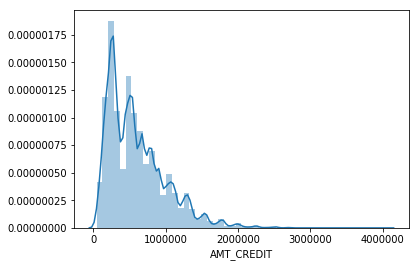

In [86]:
sns.distplot(df.AMT_CREDIT)

##### Observation:The data is highly right skewed.

### Distribution of AMT_INCOME_TOTAL

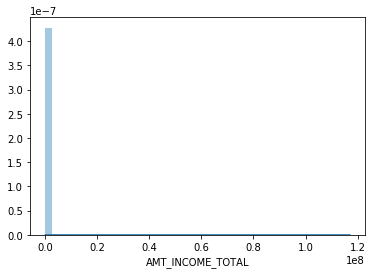

In [87]:
sns.distplot(df.AMT_INCOME_TOTAL,)

### Distribution of NAME_TYPE_SUIT

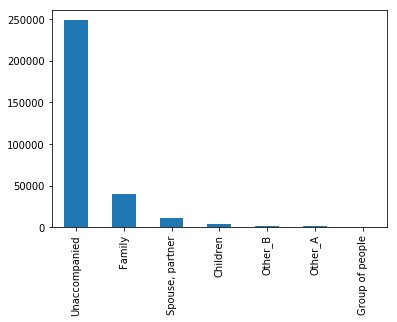

In [95]:
df['NAME_TYPE_SUITE'].value_counts().plot.bar(rot = 90)

##### Observation: Most of the samples fall under Unaccompanied category.

### Data is balanced or imbalanced

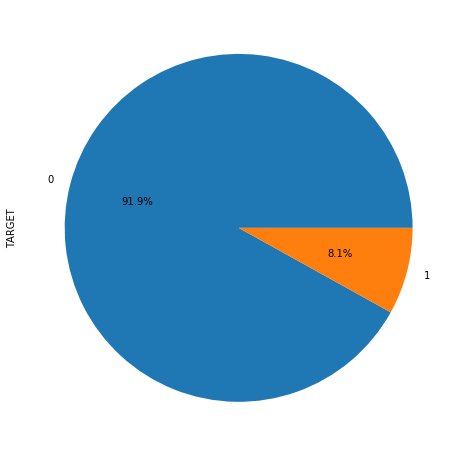

In [106]:
df['TARGET'].value_counts().plot.pie(figsize=(10, 8), autopct="%.1f%%")

###### Observation: As we can see data is highly imbalanced.

### Types of loan

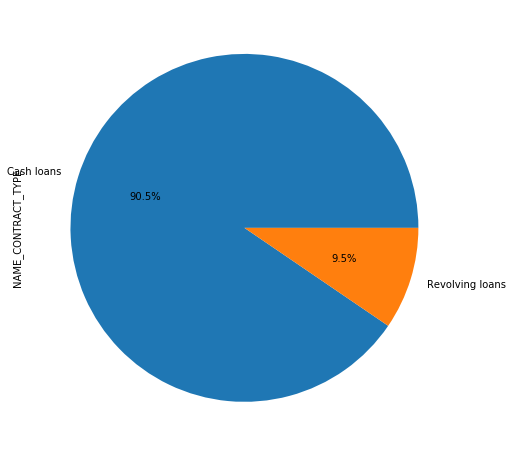

In [105]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.pie(figsize=(10,8), autopct="%.1f%%")

##### Observation: Most of the loans are Cash loans which were taken by applicants. 90.5 % loans are Cash loans.

### Purpose of loan:

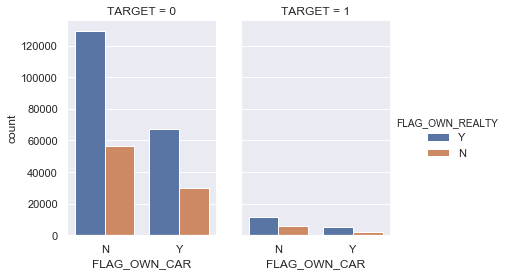

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.catplot(x='FLAG_OWN_CAR', data=df, hue="FLAG_OWN_REALTY", col="TARGET", kind="count",
                height=4, aspect=.7)

##### Observations: People with real state has more chances of defaulting.

### Income sources of Applicant's who applied for loan

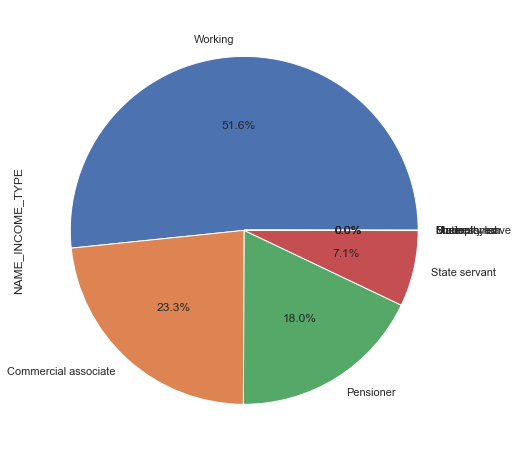

In [110]:
df['NAME_INCOME_TYPE'].value_counts().plot.pie(figsize=(10,8), autopct="%.1f%%")

#### Observation: 51.6 % Applicants mentioned that they are working. 23.3 % are Commercial Associate and 18 % are Pensioner etc.

### Family Status of Applicant's who applied for loan

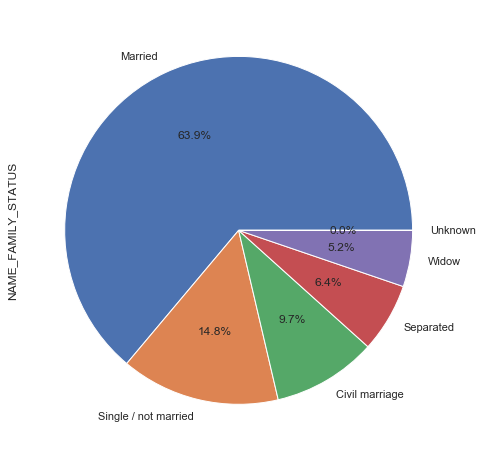

In [111]:
df['NAME_FAMILY_STATUS'].value_counts().plot.pie(figsize=(10,8), autopct="%.1f%%")

##### Observation: 63.9 % applicants are married. 14.8 % are single etc.

### Occupation of Applicant's who applied for loan

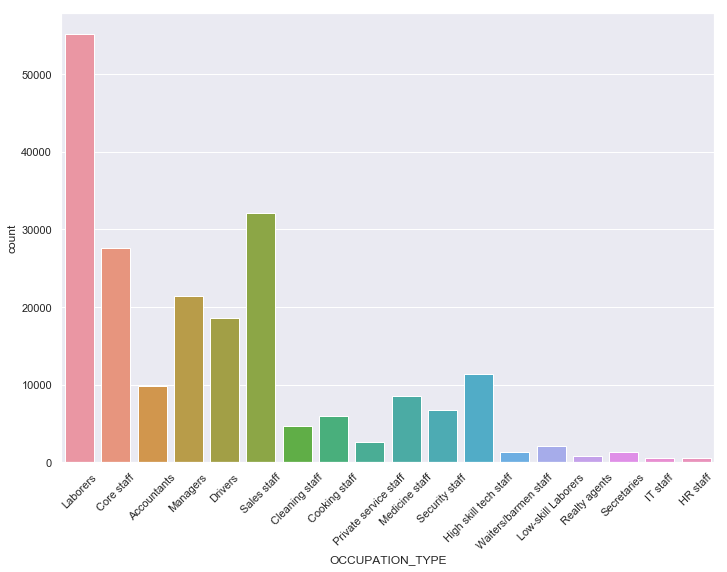

In [123]:
plt.xticks(rotation=45)
sns.countplot(df.OCCUPATION_TYPE)

##### Top Applicant's who applied for loan :
* Laborers - Apprx. 55 K
* Sales Staff - Approx. 32 K
* Core staff - Approx. 28 K
* Managers - Approx. 21 K
* Drivers - Approx. 19 K

In [ ]:
# Education of Applicant's who applied for loan

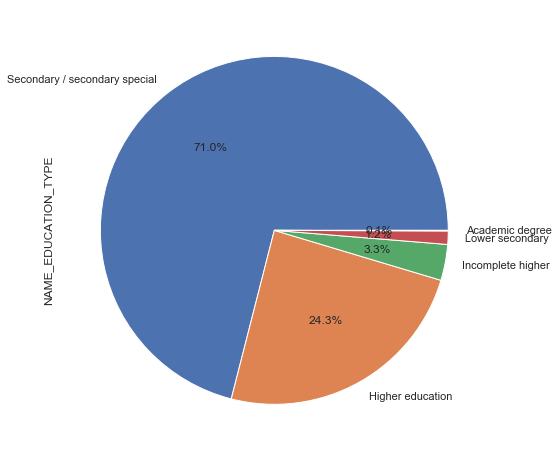

In [117]:
df['NAME_EDUCATION_TYPE'].value_counts().plot.pie(figsize=(10,8), autopct="%.1f%%")

#### Observations : 71 % applicants have secondary and 24.3 % having higher education.

### For which types of house higher applicant's applied for loan ?

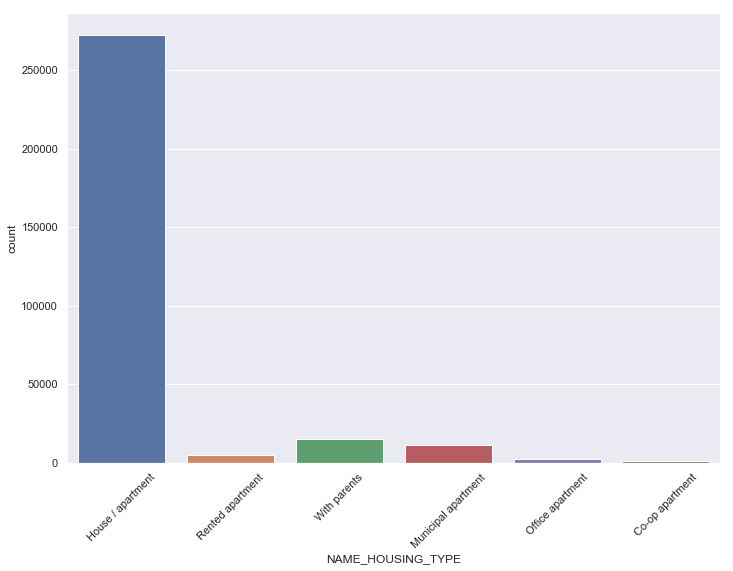

In [124]:
plt.xticks(rotation=45)
sns.countplot(df.NAME_HOUSING_TYPE)


##### Observation: Approx. 89 % peoples applied for loan, they mentioned type of house is House / Appartment.

### Types of Organizations who applied for loan 

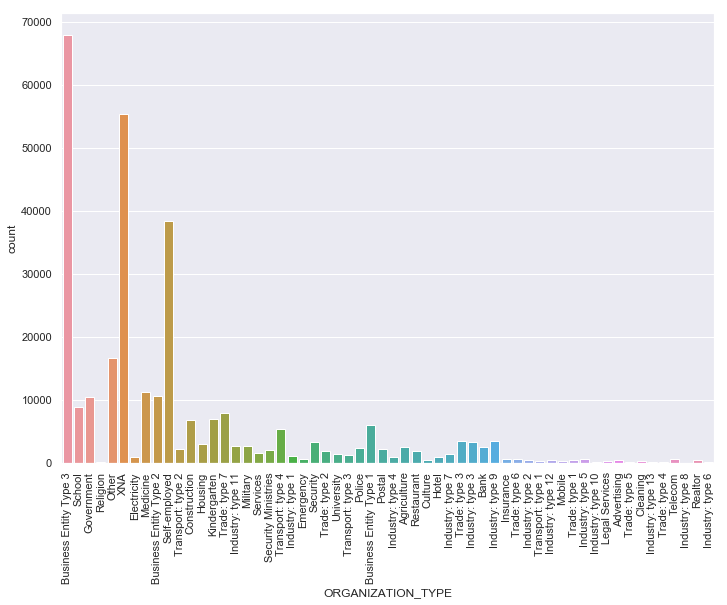

In [125]:
plt.xticks(rotation=90)
sns.countplot(df.ORGANIZATION_TYPE)

##### Types of Organizations who applied for loan :
* Business Entity Type 3 - Approx. 68 K
* XNA - Approx. 55 K
* Self employed - Approx. 38 K
* Others - Approx. 17 K
* Medicine - Approx. 11 K

 ## Exploration in terms of loan is repayed or not

### Income sources of Applicant's in terms of loan is repayed or not in %

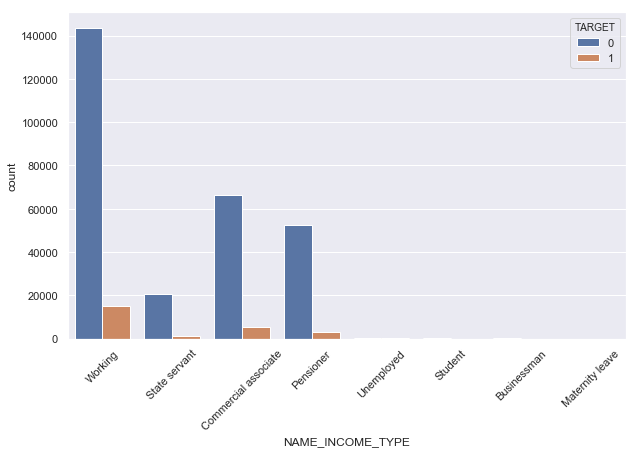

In [127]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='NAME_INCOME_TYPE', data=df, hue='TARGET')

##### Observation: Most defaulters fall under Working, Commercial associate and Pesioner category.

### Family Status of Applicant's in terms of loan is repayed or not in %

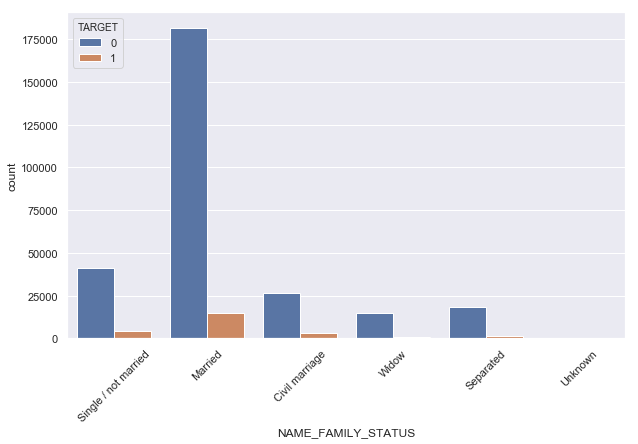

In [128]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='NAME_FAMILY_STATUS', data=df, hue='TARGET')

##### Observation: Most defaulters as well as the payers are under Married category.

### Occupation of Applicant's in terms of loan is repayed or not in %

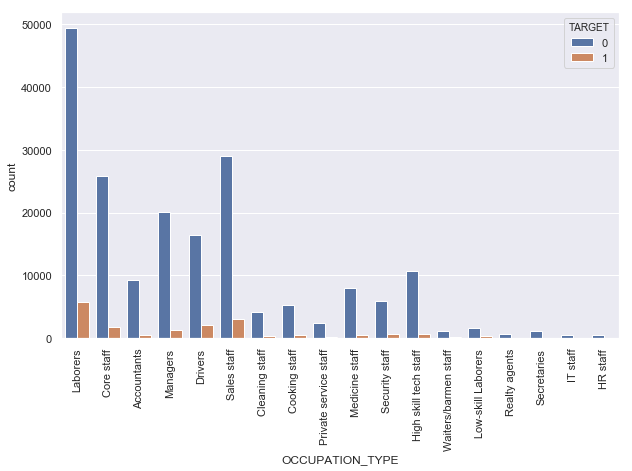

In [130]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE', data=df, hue='TARGET')

##### Observation: Most of the defaulters are from Labour class, driver class, sales staff.

### Education of Applicant's in terms of loan is repayed or not in %

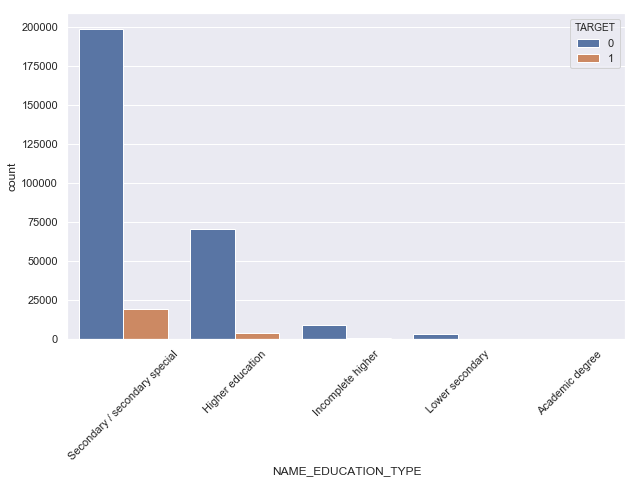

In [134]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='NAME_EDUCATION_TYPE', data=df, hue='TARGET')

##### Observation: Most of the defaulters are from Secondary/Secondary special eductaion type

### For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %

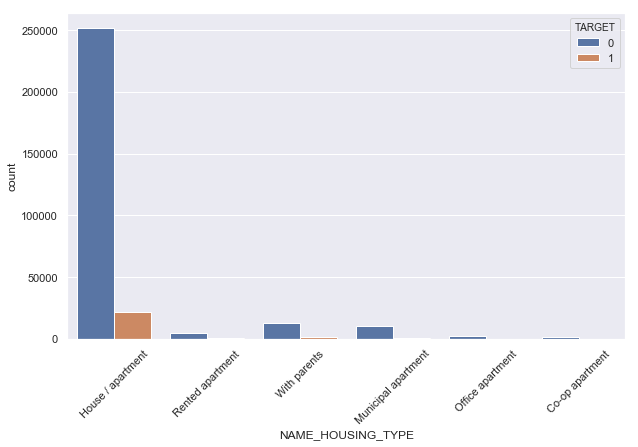

In [133]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(x='NAME_HOUSING_TYPE', data=df, hue='TARGET')

##### Observation : Most defaulters are having House/apartment

 ### Types of Organizations in terms of loan is repayed or not in %

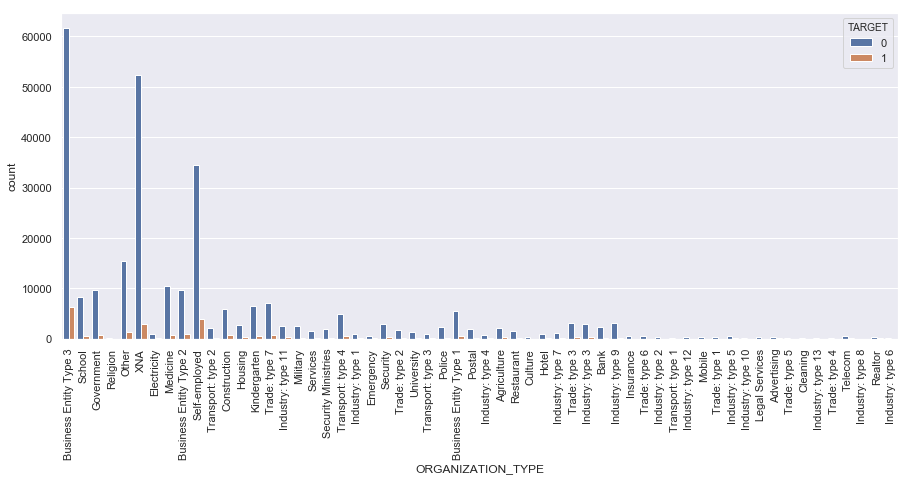

In [136]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(x='ORGANIZATION_TYPE', data=df, hue='TARGET')

##### Observation: Most defaulters are from Business Entity Type 3, Business Type 2,  and self-employed background.

### Distribution of Name of type of the Suite in terms of loan is repayed or not

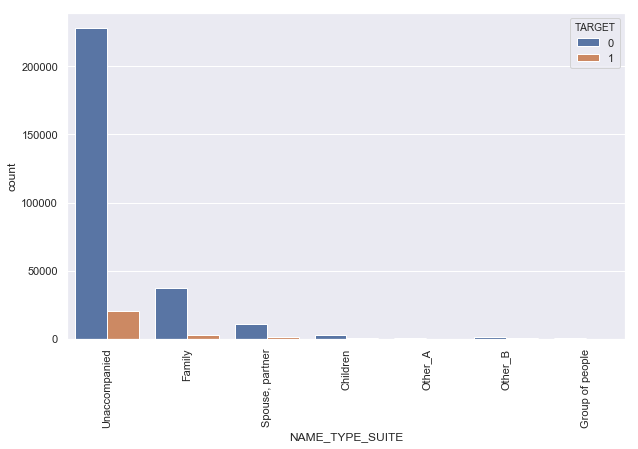

In [139]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='NAME_TYPE_SUITE', data=df, hue='TARGET')

##### Observation: Mostly sample who are unaccompanied are prone to default.

In [11]:
categorical_variables = df.select_dtypes(include = 'object')
for idx,variable in enumerate(categorical_variables.columns):
         print(variable,"\n",categorical_variables[variable].value_counts(),"\n")

NAME_CONTRACT_TYPE 
 Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

CODE_GENDER 
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

FLAG_OWN_CAR 
 N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

FLAG_OWN_REALTY 
 Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

NAME_TYPE_SUITE 
 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

NAME_INCOME_TYPE 
 Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64 

NAME_EDUCATION_TYPE 
 Secondary / secondary special    218391
Higher education                  74

In [12]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

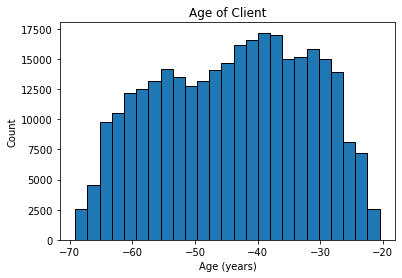

In [13]:
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [14]:
#Seperating categorical variables from numerical variable
def cat_num(data):
    num=[]
    categ=[]
    for i in data.columns:
        if (data[i].dtype=='object')or (data[i].nunique() <=5):
             categ.append(i)
        else:
            num.append(i)
    return (categ,num)

In [15]:
#seperating the target/label
y = df['TARGET']

In [16]:
#Categorical variables
cat_num(df)[0]

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19'

In [17]:
#Numerical variables
cat_num(df)[1]

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
#Plots of all categorical and numerical variable
def graphs(data):
    cat,num=cat_num(data)#changed
    for i in num:#changed
            plt.figure(figsize=(5,5))
            sns.distplot(data[i],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
            name='distplot'+i #changed
            #plt.savefig(name) #changed
    for i in num:#changed
            plt.figure(figsize=(5,5))
            sns.boxplot(data[i],color='pink')
            name='boxplot'+i #changed
            #plt.savefig(name) #changed
    for i in cat:#changed
                plt.figure(figsize=(30,5))
                sns.countplot(data[i])
                plt.xticks(rotation=45)
                name='countplot'+i #changed
                #plt.savefig(name) #changed

In [19]:
#graphs(df)

In [20]:
#Getting the outliers
def outlier_count(data):
    cat,num=cat_num(data)#changed
    for i in num:#changed
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        print(i,data[data[i]<(Q1-1.5*IQR)][i].count()+data[data[i]>(Q3+1.5*IQR)][i].count())

In [21]:
#Total outlier count
outlier_count(df)

SK_ID_CURR 0
CNT_CHILDREN 4272
AMT_INCOME_TOTAL 14035
AMT_CREDIT 6562
AMT_ANNUITY 7504
AMT_GOODS_PRICE 14728
REGION_POPULATION_RELATIVE 8412
DAYS_BIRTH 0
DAYS_EMPLOYED 72217
DAYS_REGISTRATION 659
DAYS_ID_PUBLISH 0
CNT_FAM_MEMBERS 4007
HOUR_APPR_PROCESS_START 2257
EXT_SOURCE_2 0
EXT_SOURCE_3 0
YEARS_BEGINEXPLUATATION_AVG 4784
FLOORSMAX_AVG 5215
YEARS_BEGINEXPLUATATION_MODE 5074
FLOORSMAX_MODE 5104
YEARS_BEGINEXPLUATATION_MEDI 4762
FLOORSMAX_MEDI 5360
TOTALAREA_MODE 12091
OBS_30_CNT_SOCIAL_CIRCLE 19971
DEF_30_CNT_SOCIAL_CIRCLE 35166
OBS_60_CNT_SOCIAL_CIRCLE 19564
DEF_60_CNT_SOCIAL_CIRCLE 25769
DAYS_LAST_PHONE_CHANGE 435
AMT_REQ_CREDIT_BUREAU_DAY 1489
AMT_REQ_CREDIT_BUREAU_WEEK 8536
AMT_REQ_CREDIT_BUREAU_MON 43759
AMT_REQ_CREDIT_BUREAU_QRT 50575
AMT_REQ_CREDIT_BUREAU_YEAR 3364


In [22]:
pd.DataFrame(df.columns)

,0
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR
...,...
76,AMT_REQ_CREDIT_BUREAU_DAY
77,AMT_REQ_CREDIT_BUREAU_WEEK
78,AMT_REQ_CREDIT_BUREAU_MON
79,AMT_REQ_CREDIT_BUREAU_QRT


In [23]:
#Dropping ID column from our dataframe
df.drop('SK_ID_CURR',inplace=True,axis=1)

In [24]:
#Dropping the target from our dataframe
df.drop('TARGET',inplace=True,axis=1)

# Missing value Treatment

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
ii=IterativeImputer(estimator=KNeighborsRegressor())

In [28]:
ii.fit(df[cat_num(df)[1]])

IterativeImputer(estimator=KNeighborsRegressor())

In [29]:
df_transform=ii.transform(df[cat_num(df)[1]])

In [30]:
#numerical dataframe after imputing the mean with KNN
df_num=pd.DataFrame(df_transform,columns=df[cat_num(df)[1]].columns)

In [31]:
df_num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,1.0
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,1.8
4,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,-1982.0,...,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.2,0.2,1.2
307507,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,-4388.0,-4090.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.8
307508,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,-6737.0,-5150.0,...,6.0,0.0,6.0,0.0,-1909.0,0.0,0.0,1.0,0.0,1.0
307509,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,-931.0,...,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_num.isnull().sum(axis = 0)

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 0
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT

In [33]:
cat_num(df)[0]

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DO

In [ ]:
#categorical variable imputation with mode
for i in cat_num(df)[0]:
    df[i] = df[i].fillna(df[i].mode()[0])  
    total_na_check = df[i].isna().sum()
    print(total_na_check)

In [35]:
#Assigning categorical variables to new data frame
df_cat = df[cat_num(df)[0]]

In [36]:
df_cat

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,1,...,0,0,0,0,0,0,0,0,0,0.0
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,1,...,0,0,0,0,0,0,0,0,0,1.0
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,0,0,0,0,0,0,0,0,0,0.0


In [37]:
#Combining both numerical and categorical variables to df_imputed
df_imputed=pd.concat([df_cat,df_num],axis=1)

In [38]:
df_imputed

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,1,...,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,...,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,1.8
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,...,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,1,...,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.2,0.2,1.2
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.8
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,1,...,6.0,0.0,6.0,0.0,-1909.0,0.0,0.0,1.0,0.0,1.0
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0


## Weight of evidence transformation

In [39]:
#df_imputed.to_csv('df_imputed.csv')

In [40]:
from xverse.transformer import WOE

In [41]:
#Binning ,Calculating the WOE for each bins 
clf_1=WOE(monotonic_binning=True,mono_force_bins=30)
clf_1.fit(df_imputed,y)

/Users/vinayashreek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(mono_custom_binning={'AMT_ANNUITY': array([  1615.5,   8113.5,   9243. ,  11074.5,  12478.5,  13500. ,
        14701.5,  16047. ,  16999.5,  18189. ,  19554. ,  20677.5,
        21865.5,  22644. ,  23836.5,  24903. ,  26059.5,  26766. ,
        28062. ,  29506.5,  30717. ,  32004. ,  33543. ,  35671.5,
        37516.5,  39627. ,  42624. ,  45954. ,  50463. ,  57204. ,
       258025.5]),
                         'AMT_CREDIT': array([  45000. ,  125136. ,  157500. ,  180000. ,  215865. ,  229500. ,
        254700...
              'FLAG_DOCUMENT_10': {0: 2.4762763879504062e-05, 1: 0.0},
              'FLAG_DOCUMENT_11': {0: 0.0009725546617699798,
                                   1: -0.27822778744163684},
              'FLAG_DOCUMENT_12': {0: 7.075012823393964e-06, 1: 0.0},
              'FLAG_DOCUMENT_13': {0: 0.0025262968297528055,
                                   1: -1.1266648163590953},
              'FLAG_DOCUMENT_14': {0: 0.001883820612106009,
                                

In [42]:
#Putting all the woe values in woe_df dataframe
woe_df=clf_1.woe_df

In [43]:
clf_1.transform(df_imputed)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.036236,0.250931,0.056242,-0.015093,0.012848,0.188675,0.111494,0.213706,-0.037947,0.000004,...,0.017548,0.434950,0.014831,0.502770,-0.056887,-0.000023,0.000212,0.005569,0.007395,-0.094822
1,0.036236,-0.154307,0.056242,0.033490,-0.080601,-0.363350,-0.439594,-0.071222,-0.037947,0.000004,...,-0.016192,-0.011931,-0.022191,-0.008057,0.046099,-0.000023,0.000212,0.005569,0.007395,-0.094822
2,-0.415543,0.250931,-0.117353,-0.015093,0.012848,0.188675,0.111494,0.213706,-0.037947,0.000004,...,-0.024303,-0.011931,-0.022191,-0.008057,0.046099,-0.000023,0.000212,0.005569,0.007395,-0.094822
3,0.036236,-0.154307,0.056242,-0.015093,0.012848,0.188675,0.111494,0.229088,-0.037947,0.000004,...,0.017548,-0.011931,0.014831,-0.008057,0.156264,-0.000023,0.000212,0.005569,0.007395,0.037676
4,0.036236,0.250931,0.056242,-0.015093,0.012848,0.188675,0.111494,0.213706,-0.037947,0.000004,...,-0.024303,-0.011931,-0.022191,-0.008057,-0.056887,-0.000023,0.000212,0.005569,0.007395,-0.094822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.036236,0.250931,0.056242,0.033490,0.012848,0.188675,0.111494,0.016241,0.411152,0.000004,...,-0.024303,-0.011931,-0.022191,-0.008057,0.259319,-0.000023,0.000212,0.005569,0.007395,0.291199
307507,0.036236,-0.154307,0.056242,-0.015093,0.012848,-0.433445,0.111494,-0.350653,-0.037947,0.000004,...,-0.024303,-0.011931,-0.022191,-0.008057,0.191295,-0.000023,0.000212,0.005569,0.007395,0.037676
307508,0.036236,-0.154307,0.056242,-0.015093,0.012848,0.188675,-0.439594,0.016241,-0.037947,0.000004,...,0.118389,-0.011931,0.110939,-0.008057,-0.313145,-0.000023,0.000212,-0.006639,0.007395,-0.094822
307509,0.036236,-0.154307,0.056242,-0.015093,0.012848,-0.082092,0.111494,-0.071222,-0.037947,0.000004,...,-0.024303,-0.011931,-0.022191,-0.008057,0.212728,-0.000023,0.000212,0.005569,0.007395,-0.094822


In [44]:
#Calculating the information value and sorting
(clf_1.iv_df).sort_values(by='Information_Value',ascending=False).head(5)

,Variable_Name,Information_Value
22,EXT_SOURCE_3,0.326510
21,EXT_SOURCE_2,0.322130
14,DAYS_EMPLOYED,0.103512
2,AMT_GOODS_PRICE,0.102850
13,DAYS_BIRTH,0.087766


In [45]:
#Keeping all the columns with information value less than 0.02 in a seperate list(Less important features) and dropping that list from our main dataframe
ivlt=clf_1.iv_df[clf_1.iv_df['Information_Value']<0.02]['Variable_Name']

In [46]:
list(ivlt)

['NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_6',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_OWN_CAR',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'CNT_FAM_MEMBERS',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_14',
 'CNT_CHILDREN',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_15',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_OWN_REALTY',
 'REG_REGION_NOT_LIVE_REGION',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_21',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_EMAIL',
 'FLAG_DOCUME

In [47]:
df_imputed_iv=df_imputed.drop(list(ivlt),axis=1)

In [48]:
#Dataframe after drooping features with IV <0.02
df_imputed_iv

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,M,Working,Secondary / secondary special,Single / not married,1,Laborers,2,2,0,0,...,-9461.0,-637.0,-3648.0,-2120.0,0.262949,0.139376,0.08330,0.08330,0.08330,-1134.0
1,F,State servant,Higher education,Married,1,Core staff,1,1,0,0,...,-16765.0,-1188.0,-1186.0,-291.0,0.622246,0.628502,0.29170,0.29170,0.29170,-828.0
2,M,Working,Secondary / secondary special,Single / not married,1,Laborers,2,2,0,0,...,-19046.0,-225.0,-4260.0,-2531.0,0.555912,0.729567,0.10000,0.10000,0.10000,-815.0
3,F,Working,Secondary / secondary special,Civil marriage,1,Laborers,2,2,0,0,...,-19005.0,-3039.0,-9833.0,-2437.0,0.650442,0.737596,0.19168,0.19168,0.19168,-617.0
4,M,Working,Secondary / secondary special,Single / not married,1,Core staff,2,2,0,1,...,-19932.0,-3038.0,-4311.0,-3458.0,0.322738,0.518093,0.14582,0.12500,0.14582,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,M,Working,Secondary / secondary special,Separated,1,Sales staff,1,1,0,0,...,-9327.0,-236.0,-8456.0,-1982.0,0.681632,0.511744,0.60420,0.45830,0.60420,-273.0
307507,F,Pensioner,Secondary / secondary special,Widow,0,Laborers,2,2,0,0,...,-20775.0,365243.0,-4388.0,-4090.0,0.115992,0.561040,0.08330,0.08330,0.08330,0.0
307508,F,Working,Higher education,Separated,1,Managers,3,3,0,1,...,-14966.0,-7921.0,-6737.0,-5150.0,0.535722,0.218859,0.16670,0.16670,0.16670,-1909.0
307509,F,Commercial associate,Secondary / secondary special,Married,1,Laborers,2,2,1,1,...,-11961.0,-4786.0,-2562.0,-931.0,0.514163,0.661024,0.04170,0.04170,0.04170,-322.0


In [49]:
#from sklearn.feature_selection import SelectKBest
# chi2_features = SelectKBest(chi2, k = 6) 
# X_kbest_features = chi2_features.fit_transform(df_cat_label,y) 
# print('Original feature number:', df_cat_label.shape[1]) 
# print('Reduced feature number:', X_kbest_features.shape[1])
# X_kbest_features
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix
# model = LogisticRegression(solver='liblinear', random_state=0)
#model.fit(df_final, y)

# Monotonic bining transformation 
**for variables not following monotonicity** 

In [51]:
new=cat_num(df_imputed_iv)[1]

In [52]:
new

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'DAYS_LAST_PHONE_CHANGE']

In [53]:
#Checing if a particular variable is monotonically increasing/decreasing
def monotonic(x):
    dx = np.diff(x)
    return np.all(dx <= 0) or np.all(dx >= 0)

In [54]:
drop=[]

In [55]:
#This is the result got from above code where we try for different bin size and check if features which werent monotic before can be monotonic for any bin size
mon={'DAYS_BIRTH':16,'DAYS_REGISTRATION':4,'DAYS_ID_PUBLISH':11,'EXT_SOURCE_2':20,'EXT_SOURCE_3':19,'DAYS_LAST_PHONE_CHANGE':4}

In [56]:
for i in mon.items():
    print(i)

('DAYS_BIRTH', 16)
('DAYS_REGISTRATION', 4)
('DAYS_ID_PUBLISH', 11)
('EXT_SOURCE_2', 20)
('EXT_SOURCE_3', 19)
('DAYS_LAST_PHONE_CHANGE', 4)


In [57]:
df_dict={}

In [58]:
for i in mon.items():
    clf=WOE(monotonic_binning=True,mono_force_bins=i[1])
    clf.fit(pd.DataFrame(df_imputed[i[0]]),y)
    df_dict[i[0]]=clf.transform(pd.DataFrame(df_imputed[i[0]]))

In [59]:
#If features are still not monotonic drop them
df_imputed_iv.drop(drop,axis=1,inplace=True)

In [60]:
df_imputed_iv

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,M,Working,Secondary / secondary special,Single / not married,1,Laborers,2,2,0,0,...,-9461.0,-637.0,-3648.0,-2120.0,0.262949,0.139376,0.08330,0.08330,0.08330,-1134.0
1,F,State servant,Higher education,Married,1,Core staff,1,1,0,0,...,-16765.0,-1188.0,-1186.0,-291.0,0.622246,0.628502,0.29170,0.29170,0.29170,-828.0
2,M,Working,Secondary / secondary special,Single / not married,1,Laborers,2,2,0,0,...,-19046.0,-225.0,-4260.0,-2531.0,0.555912,0.729567,0.10000,0.10000,0.10000,-815.0
3,F,Working,Secondary / secondary special,Civil marriage,1,Laborers,2,2,0,0,...,-19005.0,-3039.0,-9833.0,-2437.0,0.650442,0.737596,0.19168,0.19168,0.19168,-617.0
4,M,Working,Secondary / secondary special,Single / not married,1,Core staff,2,2,0,1,...,-19932.0,-3038.0,-4311.0,-3458.0,0.322738,0.518093,0.14582,0.12500,0.14582,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,M,Working,Secondary / secondary special,Separated,1,Sales staff,1,1,0,0,...,-9327.0,-236.0,-8456.0,-1982.0,0.681632,0.511744,0.60420,0.45830,0.60420,-273.0
307507,F,Pensioner,Secondary / secondary special,Widow,0,Laborers,2,2,0,0,...,-20775.0,365243.0,-4388.0,-4090.0,0.115992,0.561040,0.08330,0.08330,0.08330,0.0
307508,F,Working,Higher education,Separated,1,Managers,3,3,0,1,...,-14966.0,-7921.0,-6737.0,-5150.0,0.535722,0.218859,0.16670,0.16670,0.16670,-1909.0
307509,F,Commercial associate,Secondary / secondary special,Married,1,Laborers,2,2,1,1,...,-11961.0,-4786.0,-2562.0,-931.0,0.514163,0.661024,0.04170,0.04170,0.04170,-322.0


In [61]:
clf_2=WOE(monotonic_binning=True,mono_force_bins=30)
clf_2.fit(df_imputed_iv,y)

/Users/vinayashreek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(mono_custom_binning={'AMT_ANNUITY': array([  1615.5,   8113.5,   9243. ,  11074.5,  12478.5,  13500. ,
        14701.5,  16047. ,  16999.5,  18189. ,  19554. ,  20677.5,
        21865.5,  22644. ,  23836.5,  24903. ,  26059.5,  26766. ,
        28062. ,  29506.5,  30717. ,  32004. ,  33543. ,  35671.5,
        37516.5,  39627. ,  42624. ,  45954. ,  50463. ,  57204. ,
       258025.5]),
                         'AMT_CREDIT': array([  45000. ,  125136. ,  157500. ,  180000. ,  215865. ,  229500. ,
        254700...
                                             Interval(0.04622, 0.07251, closed='right'): -0.7532730720666008},
              'REGION_RATING_CLIENT': {1: -0.5504395640966111,
                                       2: -0.025025376232391785,
                                       3: 0.35220572734768874},
              'REGION_RATING_CLIENT_W_CITY': {1: -0.5459578816754621,
                                              2: -0.021087765446344352,
                               

In [62]:
transform1=clf_2.transform(df_imputed_iv)

In [63]:
df_dict.keys()

dict_keys(['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE'])

In [64]:
transform1

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,0.273799,0.323340,0.092431,0.137176,0.389081,1.288709,0.052272,0.034012,0.047098,-0.056887
1,-0.154307,-0.363350,-0.439594,-0.071222,0.076610,-0.266393,-0.550440,-0.545958,-0.048430,-0.107137,...,-0.036355,0.249817,0.098861,0.275822,-0.396193,-0.514161,0.037360,-0.220427,0.062078,0.046099
2,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.186985,0.338695,0.077364,0.124832,-0.179303,-0.920213,0.250649,0.251639,0.253466,0.046099
3,-0.154307,0.188675,0.111494,0.229088,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.186985,-0.162056,-0.332156,0.081805,-0.448653,-0.868508,0.181328,0.134028,0.100701,0.156264
4,0.250931,0.188675,0.111494,0.213706,0.076610,-0.266393,-0.025025,-0.021088,-0.048430,0.301424,...,-0.364630,-0.162056,0.077364,-0.142689,0.405198,-0.166656,0.203829,0.096023,0.212219,-0.056887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.076610,0.193663,-0.550440,-0.545958,-0.048430,-0.107137,...,0.273799,0.338695,-0.122211,0.102234,-0.572092,-0.049355,-0.559573,-0.176190,-0.567114,0.259319
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.430718,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.393012,-0.338116,0.077364,-0.127929,0.860540,-0.228404,0.052272,0.034012,0.047098,0.191295
307508,-0.154307,0.188675,-0.439594,0.016241,0.076610,-0.281720,0.352206,0.382184,-0.048430,0.301424,...,0.021094,-0.703416,-0.026828,-0.247767,-0.026902,0.715558,-0.084340,-0.124419,-0.085300,-0.313145
307509,-0.154307,-0.082092,0.111494,-0.071222,0.076610,-0.010773,-0.025025,-0.021088,0.461282,0.301424,...,0.207457,-0.387076,0.098432,0.253338,-0.075259,-0.570542,0.145519,0.137147,0.144009,0.212728


In [65]:
for i in mon.keys():
    transform1[i]=np.array(df_dict[i])

In [66]:
transform1

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,0.394603,0.323340,0.085867,0.090476,0.494494,1.161988,0.052272,0.034012,0.047098,-0.080607
1,-0.154307,-0.363350,-0.439594,-0.071222,0.076610,-0.266393,-0.550440,-0.545958,-0.048430,-0.107137,...,-0.083403,0.249817,0.133858,0.259606,-0.309290,-0.496456,0.037360,-0.220427,0.062078,-0.080607
2,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.185642,0.338695,0.085867,0.089777,-0.104502,-0.792495,0.250649,0.251639,0.253466,-0.080607
3,-0.154307,0.188675,0.111494,0.229088,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.185642,-0.162056,-0.267573,0.090476,-0.490991,-0.906774,0.181328,0.134028,0.100701,0.165495
4,0.250931,0.188675,0.111494,0.213706,0.076610,-0.266393,-0.025025,-0.021088,-0.048430,0.301424,...,-0.341265,-0.162056,0.085867,-0.004048,0.400795,-0.184430,0.203829,0.096023,0.212219,-0.080607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.076610,0.193663,-0.550440,-0.545958,-0.048430,-0.107137,...,0.394603,0.338695,-0.267573,0.090476,-0.577890,-0.065078,-0.559573,-0.176190,-0.567114,0.181934
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.430718,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.415038,-0.338116,0.085867,-0.111661,1.173356,-0.243281,0.052272,0.034012,0.047098,0.181934
307508,-0.154307,0.188675,-0.439594,0.016241,0.076610,-0.281720,0.352206,0.382184,-0.048430,0.301424,...,-0.039574,-0.703416,0.008675,-0.330462,-0.079867,0.735612,-0.084340,-0.124419,-0.085300,-0.340684
307509,-0.154307,-0.082092,0.111494,-0.071222,0.076610,-0.010773,-0.025025,-0.021088,0.461282,0.301424,...,0.245387,-0.387076,0.085867,0.215177,-0.079867,-0.563940,0.145519,0.137147,0.144009,0.165495


In [67]:
df_transform=transform1

In [68]:
df_transform

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,0.394603,0.323340,0.085867,0.090476,0.494494,1.161988,0.052272,0.034012,0.047098,-0.080607
1,-0.154307,-0.363350,-0.439594,-0.071222,0.076610,-0.266393,-0.550440,-0.545958,-0.048430,-0.107137,...,-0.083403,0.249817,0.133858,0.259606,-0.309290,-0.496456,0.037360,-0.220427,0.062078,-0.080607
2,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.185642,0.338695,0.085867,0.089777,-0.104502,-0.792495,0.250649,0.251639,0.253466,-0.080607
3,-0.154307,0.188675,0.111494,0.229088,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.185642,-0.162056,-0.267573,0.090476,-0.490991,-0.906774,0.181328,0.134028,0.100701,0.165495
4,0.250931,0.188675,0.111494,0.213706,0.076610,-0.266393,-0.025025,-0.021088,-0.048430,0.301424,...,-0.341265,-0.162056,0.085867,-0.004048,0.400795,-0.184430,0.203829,0.096023,0.212219,-0.080607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.076610,0.193663,-0.550440,-0.545958,-0.048430,-0.107137,...,0.394603,0.338695,-0.267573,0.090476,-0.577890,-0.065078,-0.559573,-0.176190,-0.567114,0.181934
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.430718,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-0.415038,-0.338116,0.085867,-0.111661,1.173356,-0.243281,0.052272,0.034012,0.047098,0.181934
307508,-0.154307,0.188675,-0.439594,0.016241,0.076610,-0.281720,0.352206,0.382184,-0.048430,0.301424,...,-0.039574,-0.703416,0.008675,-0.330462,-0.079867,0.735612,-0.084340,-0.124419,-0.085300,-0.340684
307509,-0.154307,-0.082092,0.111494,-0.071222,0.076610,-0.010773,-0.025025,-0.021088,0.461282,0.301424,...,0.245387,-0.387076,0.085867,0.215177,-0.079867,-0.563940,0.145519,0.137147,0.144009,0.165495


# VIF
**dropping multicollinear variables**

In [69]:
#VIF Removing the features with high multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            #print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
            #      '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]


In [70]:
#Updating the numerical features after removing features with high multicollinearity
df_vifrem = calculate_vif_(df_transform,thresh =2)

Remaining variables:
Index(['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'FLAG_DOCUMENT_3', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [72]:
df_vifrem

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3,...,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,DAYS_LAST_PHONE_CHANGE
0,0.250931,0.188675,0.111494,0.213706,-0.010773,-0.021088,-0.048430,-0.107137,0.154898,0.099767,...,0.056169,0.327240,0.394603,0.323340,0.085867,0.090476,0.494494,1.161988,0.052272,-0.080607
1,-0.154307,-0.363350,-0.439594,-0.071222,-0.266393,-0.545958,-0.048430,-0.107137,-0.334264,0.099767,...,0.100844,-0.396426,-0.083403,0.249817,0.133858,0.259606,-0.309290,-0.496456,0.037360,-0.080607
2,0.250931,0.188675,0.111494,0.213706,-0.010773,-0.021088,-0.048430,-0.107137,-0.157575,-0.287143,...,-0.263057,-0.204166,-0.185642,0.338695,0.085867,0.089777,-0.104502,-0.792495,0.250649,-0.080607
3,-0.154307,0.188675,0.111494,0.229088,-0.010773,-0.021088,-0.048430,-0.107137,0.154898,0.099767,...,0.258207,0.193492,-0.185642,-0.162056,-0.267573,0.090476,-0.490991,-0.906774,0.181328,0.165495
4,0.250931,0.188675,0.111494,0.213706,-0.266393,-0.021088,-0.048430,0.301424,-0.340103,-0.287143,...,0.157238,-0.060489,-0.341265,-0.162056,0.085867,-0.004048,0.400795,-0.184430,0.203829,-0.080607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.193663,-0.545958,-0.048430,-0.107137,-0.216821,-0.287143,...,-0.003073,0.114457,0.394603,0.338695,-0.267573,0.090476,-0.577890,-0.065078,-0.559573,0.181934
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.010773,-0.021088,-0.048430,-0.107137,-0.430842,0.099767,...,-0.292016,0.114457,-0.415038,-0.338116,0.085867,-0.111661,1.173356,-0.243281,0.052272,0.181934
307508,-0.154307,0.188675,-0.439594,0.016241,-0.281720,0.382184,-0.048430,0.301424,-0.334264,0.099767,...,0.258207,-0.141055,-0.039574,-0.703416,0.008675,-0.330462,-0.079867,0.735612,-0.084340,-0.340684
307509,-0.154307,-0.082092,0.111494,-0.071222,-0.010773,-0.021088,0.461282,0.301424,0.008792,0.099767,...,-0.035255,0.193492,0.245387,-0.387076,0.085867,0.215177,-0.079867,-0.563940,0.145519,0.165495


## Finding out feature importance using RFE

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression


In [74]:
from sklearn.feature_selection import RFE

In [75]:
#Selecting best feature set using recursive feature elimination method.We select the top 5 features here
rfe=RFE(estimator=LogisticRegression(class_weight='balanced'),n_features_to_select=5)

In [76]:
rfe.fit(df_vifrem,y,)

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=5)

In [77]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False])

In [78]:
#Rank features in the order of importance 
rfe.ranking_

array([ 1, 17,  1,  8,  7,  9,  6, 15,  3,  1, 16, 11,  2, 14,  5, 13, 12,
        1,  1,  4, 10])

In [79]:
#Take only variables with high support and pass it to the below data frame
df_vifrem_rfe=df_vifrem[df_vifrem.columns[rfe.support_]]
df_vifrem_rfe

,CODE_GENDER,NAME_EDUCATION_TYPE,FLAG_DOCUMENT_3,EXT_SOURCE_2,EXT_SOURCE_3
0,0.250931,0.111494,0.099767,0.494494,1.161988
1,-0.154307,-0.439594,0.099767,-0.309290,-0.496456
2,0.250931,0.111494,-0.287143,-0.104502,-0.792495
3,-0.154307,0.111494,0.099767,-0.490991,-0.906774
4,0.250931,0.111494,-0.287143,0.400795,-0.184430
...,...,...,...,...,...
307506,0.250931,0.111494,-0.287143,-0.577890,-0.065078
307507,-0.154307,0.111494,0.099767,1.173356,-0.243281
307508,-0.154307,-0.439594,0.099767,-0.079867,0.735612
307509,-0.154307,0.111494,0.099767,-0.079867,-0.563940


In [80]:

# #Feature Importance with Extra Trees Classifier
# from pandas import read_csv
# from sklearn.ensemble import ExtraTreesClassifier
# # load data
# # url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
# # names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# # dataframe = read_csv(url, names=names)
# # array = dataframe.values
# # X = array[:,0:8]
# # Y = array[:,8]
# # feature extraction
# model = ExtraTreesClassifier(n_estimators=10)
# model.fit(df_vifrem_rfe, y)
# arr = (model.feature_importances_)
# type(arr)
# arr

# feature_importance = pd.DataFrame(arr,df_vifrem_rfe.columns)
# feature_importance.columns = ['importance']
# feature_importance
# feature_importance.sort_values(by=['importance'])

#df_vifrem_rfe=df_vifrem_rfe.drop('CODE_GENDER',1)
# df_vifrem_rfe=df_vifrem_rfe.drop('REG_CITY_NOT_LIVE_CITY',1)
# df_vifrem_rfe=df_vifrem_rfe.drop('FLAG_DOCUMENT_3',1)
# df_vifrem_rfe=df_vifrem_rfe.drop('NAME_EDUCATION_TYPE',1)
# df_vifrem_rfe=df_vifrem_rfe.drop('EXT_SOURCE_2',1)
# df_vifrem_rfe

In [81]:
df_vifrem_rfe.columns

Index(['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_3'],
      dtype='object')

## Model Building

In [82]:
#Train test split for cross validation
X_train, X_test, y_train, y_test = train_test_split(df_vifrem_rfe, y, test_size=0.33, random_state=42,stratify=y)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr=LogisticRegression(class_weight='balanced')

In [85]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [86]:
predicted=lr.predict(X_test)

In [87]:
pred_prob=lr.predict_proba(X_test)

Feature: 0, Score: 1.00091
Feature: 1, Score: 0.77514
Feature: 2, Score: 0.91113
Feature: 3, Score: 0.89142
Feature: 4, Score: 0.93897


<ipython-input-88-41d520f8dcc8>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


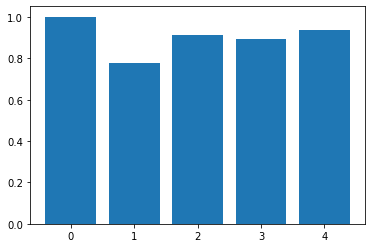

In [88]:
#Plotting importance of each feature seperately
import matplotlib.pyplot as plt
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [89]:
#fucntion to calculate right cutoff probability using youden's J statistic
def threshold(y_test,prob,two_d_array):
    # calculate roc curves
    if two_d_array == True:
        fpr, tpr, thresholds=roc_curve(y_test,prob[:,1])
    else :
        fpr, tpr, thresholds=roc_curve(y_test,prob)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    return best_thresh

In [90]:
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

from sklearn.metrics import roc_curve

In [91]:
threshold(y_test,pred_prob,True)

0.49810343143472435

In [92]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     93287
           1       0.15      0.66      0.24      8192

    accuracy                           0.67    101479
   macro avg       0.55      0.67      0.52    101479
weighted avg       0.89      0.67      0.75    101479



In [93]:
lr.intercept_

array([-0.00222655])

In [94]:
lr.coef_

array([[1.00090892, 0.77514257, 0.91113485, 0.89142262, 0.93897153]])

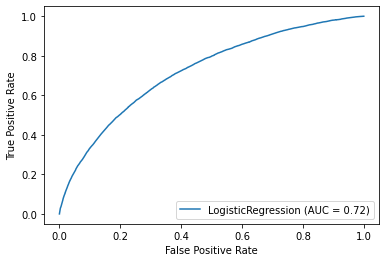

In [95]:
import sklearn
sklearn.metrics.plot_roc_curve(lr,X_test,y_test)

In [96]:
confusion_matrix(y_test, lr.predict(X_test))

array([[62659, 30628],
       [ 2783,  5409]])

In [97]:
score = lr.score(X_test,y_test)
score

0.6707594674760295

## Lets use Random forest for feature selection and compare the features we got from RFE and compare the Recall and F1 score

In [98]:
#df_vifrem is the df before we did RFE and selected 5 features# Lets see which are the top features selected by random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.25, random_state=2018)
rf.fit(df_vifrem, y)
features = df_vifrem.columns.values
#df_vifrem

In [99]:
val = rf.feature_importances_
feature_importance = pd.DataFrame(val,features)
feature_importance.columns = ['importance']
feature_importance
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)
feature_importance

,importance
EXT_SOURCE_3,0.303110
EXT_SOURCE_2,0.295795
AMT_GOODS_PRICE,0.063969
DAYS_EMPLOYED,0.056115
NAME_EDUCATION_TYPE,0.036533
ORGANIZATION_TYPE,0.034035
AMT_CREDIT,0.031555
DAYS_BIRTH,0.031334
OCCUPATION_TYPE,0.020722
AMT_ANNUITY,0.019917


In [101]:
for i in range(len(feature_importance)):
    if i >= 5:
        df_vifrem.drop(features[i],1,inplace = True)


In [102]:
df_vifrem

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE
0,0.250931,0.188675,0.111494,0.213706,-0.010773
1,-0.154307,-0.363350,-0.439594,-0.071222,-0.266393
2,0.250931,0.188675,0.111494,0.213706,-0.010773
3,-0.154307,0.188675,0.111494,0.229088,-0.010773
4,0.250931,0.188675,0.111494,0.213706,-0.266393
...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.193663
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.010773
307508,-0.154307,0.188675,-0.439594,0.016241,-0.281720
307509,-0.154307,-0.082092,0.111494,-0.071222,-0.010773


In [103]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(df_vifrem, y, test_size=0.33, random_state=42,stratify=y)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr=LogisticRegression(class_weight='balanced')

In [106]:
lr.fit(X_train_RF,y_train_RF)

LogisticRegression(class_weight='balanced')

In [107]:
predicted=lr.predict(X_test_RF)

In [108]:
pred_prob=lr.predict_proba(X_test_RF)

In [109]:
print(classification_report(y_test_RF,predicted))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     93287
           1       0.11      0.61      0.19      8192

    accuracy                           0.57    101479
   macro avg       0.53      0.59      0.45    101479
weighted avg       0.88      0.57      0.66    101479



## RFE Feature selection gave better features compared to Random forest feature selection (Recall was better for RFE model, So lets consider Features we got from RFE moving forward)



### 'CODE_GENDER', 
### 'NAME_EDUCATION_TYPE', 
### 'FLAG_DOCUMENT_3', 
### 'EXT_SOURCE_2',
### 'EXT_SOURCE_3',
 

# smote

In [110]:
#Using smote for class balancing in stats model
#X_train and Y_train have dataframe we got from Recursive feature elimination I considered that since that performed better than Random forest feature selection
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

# Statsmodels

In [111]:
#Trying the same thing in statsmodel
import statsmodels.api as sm 
import statsmodels.tools.tools
X_train = sm.add_constant(X_train_res)
#sm.OLS(y,X)
log_reg = sm.Logit(y_train_res, X_train_res).fit()

Optimization terminated successfully.
         Current function value: 0.613282
         Iterations 5


In [112]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               378798
Model:                          Logit   Df Residuals:                   378793
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Feb 2021   Pseudo R-squ.:                  0.1152
Time:                        12:12:40   Log-Likelihood:            -2.3231e+05
converged:                       True   LL-Null:                   -2.6256e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
CODE_GENDER             1.0011      0.018     55.635      0.000       0.966       1.036
NAME_EDUCATION_TYPE     0.7526      0.016     47.482      0.000       0.722       0.784
FLAG_DOCUMENT_3         0.9197      0.021     43.808      0.000       0.879       0.961
EXT_SOURCE_2            0.8965      0.006    138.902      0.000       0.884       0.909
EXT_SOURCE_3            0.9365      0.006    147.134      0.000       0.924       0.949
=======================================================================================
"""

In [113]:
#X_test = sm.add_constant(X_test)
#X_test

In [114]:
prob=log_reg.predict(X_test)

In [115]:
threshold(y_test,prob,False)

0.4982338239041586

In [116]:
prob

234263    0.558694
304989    0.408061
108535    0.462768
307154    0.466688
253190    0.374440
            ...   
35151     0.200683
250226    0.276650
88591     0.579221
106205    0.413932
101154    0.196435
Length: 101479, dtype: float64

In [117]:
prob[prob>0.5]=1
prob[prob<=0.5]=0

In [118]:
prob

234263    1.0
304989    0.0
108535    0.0
307154    0.0
253190    0.0
         ... 
35151     0.0
250226    0.0
88591     1.0
106205    0.0
101154    0.0
Length: 101479, dtype: float64

In [119]:
print(classification_report(y_test,prob))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     93287
           1       0.15      0.66      0.24      8192

    accuracy                           0.67    101479
   macro avg       0.55      0.67      0.52    101479
weighted avg       0.89      0.67      0.75    101479



In [120]:
df_vifrem_rfe.columns

Index(['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'FLAG_DOCUMENT_3', 'EXT_SOURCE_2',
       'EXT_SOURCE_3'],
      dtype='object')

In [121]:
coef={'CODE_GENDER':1.0011, 'NAME_EDUCATION_TYPE':0.7527, 'FLAG_DOCUMENT_3':0.9198, 'EXT_SOURCE_2':0.8965,
       'EXT_SOURCE_3':0.9365}

In [122]:
coef_pd=pd.DataFrame(data=[coef.keys(),coef.values()]).T

In [123]:
coef_pd['percentage']=(np.e**coef_pd[1]-1)*100

In [124]:
coef_pd

,0,1,percentage
0,CODE_GENDER,1.0011,172.127
1,NAME_EDUCATION_TYPE,0.7527,112.272
2,FLAG_DOCUMENT_3,0.9198,150.879
3,EXT_SOURCE_2,0.8965,145.101
4,EXT_SOURCE_3,0.9365,155.104


# optional 

## (Comparing the result of our model with binning and without binning)
## (Without binning) 

In [125]:
#Replacing the numerical variable values with IV to Original numerical variables
#Categorical variable still has IV values 
for i in cat_num(df_imputed_iv)[1]:
    transform1[i]=df_imputed[i]

In [126]:
transform1

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MODE,FLOORSMAX_MEDI,DAYS_LAST_PHONE_CHANGE
0,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-9461.0,-637.0,-3648.0,-2120.0,0.262949,0.139376,0.08330,0.08330,0.08330,-1134.0
1,-0.154307,-0.363350,-0.439594,-0.071222,0.076610,-0.266393,-0.550440,-0.545958,-0.048430,-0.107137,...,-16765.0,-1188.0,-1186.0,-291.0,0.622246,0.628502,0.29170,0.29170,0.29170,-828.0
2,0.250931,0.188675,0.111494,0.213706,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-19046.0,-225.0,-4260.0,-2531.0,0.555912,0.729567,0.10000,0.10000,0.10000,-815.0
3,-0.154307,0.188675,0.111494,0.229088,0.076610,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-19005.0,-3039.0,-9833.0,-2437.0,0.650442,0.737596,0.19168,0.19168,0.19168,-617.0
4,0.250931,0.188675,0.111494,0.213706,0.076610,-0.266393,-0.025025,-0.021088,-0.048430,0.301424,...,-19932.0,-3038.0,-4311.0,-3458.0,0.322738,0.518093,0.14582,0.12500,0.14582,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.250931,0.188675,0.111494,0.016241,0.076610,0.193663,-0.550440,-0.545958,-0.048430,-0.107137,...,-9327.0,-236.0,-8456.0,-1982.0,0.681632,0.511744,0.60420,0.45830,0.60420,-273.0
307507,-0.154307,-0.433445,0.111494,-0.350653,-0.430718,-0.010773,-0.025025,-0.021088,-0.048430,-0.107137,...,-20775.0,365243.0,-4388.0,-4090.0,0.115992,0.561040,0.08330,0.08330,0.08330,0.0
307508,-0.154307,0.188675,-0.439594,0.016241,0.076610,-0.281720,0.352206,0.382184,-0.048430,0.301424,...,-14966.0,-7921.0,-6737.0,-5150.0,0.535722,0.218859,0.16670,0.16670,0.16670,-1909.0
307509,-0.154307,-0.082092,0.111494,-0.071222,0.076610,-0.010773,-0.025025,-0.021088,0.461282,0.301424,...,-11961.0,-4786.0,-2562.0,-931.0,0.514163,0.661024,0.04170,0.04170,0.04170,-322.0


In [127]:
#Updating the numerical features after removing features with high multicollinearity
df_vifrem_WithoutBinning = calculate_vif_(transform1,thresh =5)

Remaining variables:
Index(['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLOORSMAX_MODE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_vifrem_WithoutBinning, y, test_size=0.33, random_state=42,stratify=y)

In [129]:
from sklearn.feature_selection import RFECV

In [130]:
rfe_2=RFECV(estimator=LogisticRegression(class_weight='balanced'),min_features_to_select=5)

In [131]:
rfe_2.fit(df_vifrem_WithoutBinning,y,)

RFECV(estimator=LogisticRegression(class_weight='balanced'),
      min_features_to_select=5)

In [132]:
rfe_2.support_

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False,  True])

In [133]:
df_fs=df_vifrem_WithoutBinning[df_vifrem_WithoutBinning.columns[rfe_2.support_]]
df_fs

,NAME_INCOME_TYPE,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,0.188675,0.154898,-3648.0,-2120.0,-1134.0
1,-0.363350,-0.334264,-1186.0,-291.0,-828.0
2,0.188675,-0.157575,-4260.0,-2531.0,-815.0
3,0.188675,0.154898,-9833.0,-2437.0,-617.0
4,0.188675,-0.340103,-4311.0,-3458.0,-1106.0
...,...,...,...,...,...
307506,0.188675,-0.216821,-8456.0,-1982.0,-273.0
307507,-0.433445,-0.430842,-4388.0,-4090.0,0.0
307508,0.188675,-0.334264,-6737.0,-5150.0,-1909.0
307509,-0.082092,0.008792,-2562.0,-931.0,-322.0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(df_fs, y, test_size=0.33, random_state=42,stratify=y)

In [135]:
lr=LogisticRegression(class_weight='balanced')

In [136]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [137]:
predicted=lr.predict(X_test)

In [138]:
X_test

,NAME_INCOME_TYPE,ORGANIZATION_TYPE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
234263,0.188675,0.254436,-2140.0,-4502.0,0.0
304989,0.188675,-0.059455,-2245.0,-2243.0,0.0
108535,0.188675,0.154898,-2480.0,-2073.0,-897.0
307154,0.188675,0.075833,-7778.0,-555.0,-1541.0
253190,-0.433445,-0.430842,-767.0,-1627.0,-3.0
...,...,...,...,...,...
35151,-0.433445,-0.430842,-4961.0,-4670.0,-33.0
250226,-0.433445,-0.430842,-5949.0,-2491.0,-1817.0
88591,0.188675,0.254436,-2688.0,-4603.0,0.0
106205,-0.363350,-0.017418,-11307.0,-4695.0,-226.0


In [139]:
pred_prob=lr.predict_proba(X_test)

In [141]:
thresh=threshold(y_test,pred_prob,True)

In [142]:
lr_pred_prob=pred_prob[:,1]

In [143]:
lr_pred_prob[lr_pred_prob>thresh]=1

In [144]:
lr_pred_prob[lr_pred_prob<=thresh]=0

In [145]:
print(classification_report(y_test,lr_pred_prob))

              precision    recall  f1-score   support

           0       0.94      0.43      0.59     93287
           1       0.09      0.68      0.17      8192

    accuracy                           0.45    101479
   macro avg       0.52      0.55      0.38    101479
weighted avg       0.87      0.45      0.56    101479



### As this model is predicting the probablity a customer will default or not, the most important metric is recall

#### Recall(for default 1) is the measure of our model correctly identifying customers who are likely to default, which is 0.68 so our model is able to predict 68% of the cutomers who will default correctly**

#### Precision (for default 0) is also an important metric as it is desirable  to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters, so a score of 94% is really decent.
